# Pymaceuticals Inc.
---

### Analysis

- According to the test results of this study, Ramicane may produce marginally better if not comparable results to Capomulin in having a smaller final tumor volume. In the box plot, Ramicane yielded lower median, maximum, and minimum tumor volume, however, it did have a slightly higher upper quartile. The mice that were on Ramicane and Capomulin had outperformed mice on Infubinol or Ceftamin by nearly two-fold.

- From this study, we can determine that on average weight has a positive correlation to average tumor volume. This means that having a larger weight can attribute to a larger tumor.

- The tumor volume of a mouse on the Capomulin does not show linear improvement. The shrinking of the tumor volume can start approximately 20 days after starting Capomulin treatment. The tumor will have sharp rates of shrinkage, but can continue to face growth during treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, 
                                 how='left', on ='Mouse ID')

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = data['Mouse ID'].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data[data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data[data["Mouse ID"].isin(duplicates) == True]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data[data["Mouse ID"].isin(duplicates) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean = clean_df['Mouse ID'].nunique()
count_clean

248

## Summary Statistics

In [66]:
######################################    Should I calculate each using groupby   #####################################

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# tumor_volume = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)']

# mean = np.array([np.mean(tumor_volume.get_group(regimen)) for regimen in tumor_volume.groups])
# median = np.array([np.median(tumor_volume.get_group(regimen)) for regimen in tumor_volume.groups])
# variance = np.array([np.var(tumor_volume.get_group(regimen), ddof = 1) for regimen in tumor_volume.groups])
# sd = np.array([np.std(tumor_volume.get_group(regimen), ddof = 1) for regimen in tumor_volume.groups])
# sqrt = np.array([np.sqrt(len(tumor_volume.get_group(regimen))) for regimen in tumor_volume.groups])
# sem = sd / sqrt

mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
variance = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
sd = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sqrt = np.array([np.sqrt(len(tumor_volume.get_group(regimen))) for regimen in tumor_volume.groups])
sem = sd / sqrt

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Drug Regimen": clean_df["Drug Regimen"].unique(),
    "Mean Tumor Volume":mean,
    "Median Tumor Volue":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev.":sd,
    "Tumor Volume Std. Err.":sem
})


summary_stats_table = summary_stats.set_index('Drug Regimen')

summary_stats_table

,Mean Tumor Volume,Median Tumor Volue,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,52.591172,51.776157,39.290177,6.268188,0.469821
Naftisol,52.884795,51.820584,43.128684,6.567243,0.492236
Infubinol,55.235638,53.698743,68.553577,8.279709,0.603860
Stelasyn,54.331565,52.509285,66.173479,8.134708,0.596466
Ramicane,54.033581,52.288934,61.168083,7.821003,0.581331
Zoniferol,52.320930,50.446266,43.852013,6.622085,0.544332
Propriva,40.216745,40.673236,23.486704,4.846308,0.320955
Placebo,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean=np.mean,
    median=np.median,
    vare=np.var,
    std=np.std,
    sem=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
)

agg_stats

,mean,median,vare,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

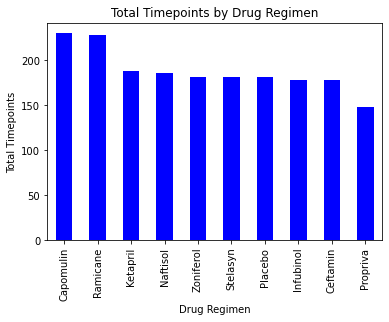

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group the data by drug regimen and count the number of timepoints for each group and sort
timepoints_df = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# Plot the data as a bar plot
timepoints_df.plot(kind='bar', color='blue')

# Set the chart title and axis labels
plt.title('Total Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.xticks(rotation="vertical")

plt.show()
plt.tight_layout()

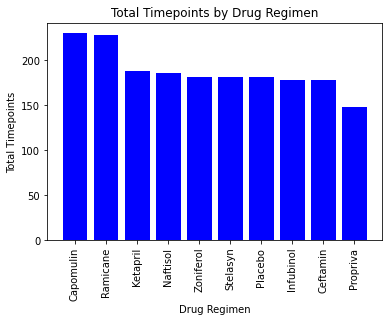

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints_df.index, timepoints_df.values, color='blue', align="center")

# Set the chart title and axis labels
plt.title('Total Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.xticks(rotation="vertical")

plt.show()
plt.tight_layout()

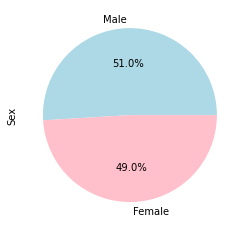

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Labels for the sections of pie chart
labels = ["Male", "Female"]
colors = ["lightblue", "pink"]

#Clean data by sex and count values for females versus males
pie = clean_df["Sex"].value_counts()

# # The values of each section of the pie chart
pie.plot(kind="pie", colors=colors, labels=labels, autopct="%1.1f%%")

plt.show()

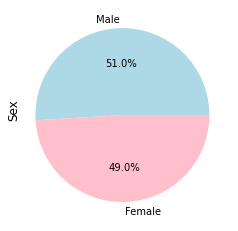

In [222]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of pie chart
labels = ["Male", "Female"]
colors = ["lightblue", "pink"]
plt.title("Sex", x=0, y=0.5, ha="center", va="center", rotation=90)

#Clean data by sex and count values for females versus males
pie = clean_df["Sex"].value_counts()

# Plot the pie chart with the information above
plt.pie(pie, labels=labels, colors=colors, autopct="%1.1f%%")


plt.show()

## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# four_treatments_df = clean_df[(clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']))]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max()).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge = pd.merge(clean_df, last_timepoint_df, 
                                 how='left', on ='Mouse ID')
# timepoint_merge.head()
timepoint_merge.tail()

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45
1879,b879,45,72.555239,2,Stelasyn,Female,4,26,45


In [120]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in drugs:
    group_df = four_treatments_df[four_treatments_df['Drug Regimen'] == treatment]
    tumor_volumes = group_df['Tumor Volume (mm3)']
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = group_df[(group_df['Tumor Volume (mm3)'] < lower_bound) | (group_df['Tumor Volume (mm3)'] > upper_bound)]["Tumor Volume (mm3)"]
    print(f"{treatment}'s potential outliers: {outliers}")
    tumor_vol_data.append(tumor_volumes)

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


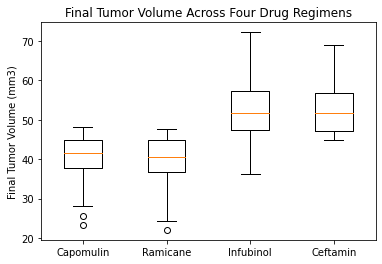

In [115]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(drugs)
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

AttributeError: 'list' object has no attribute 'mean'

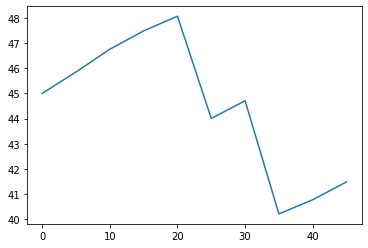

In [188]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Look at all data for a mouse treated with Capomul
capomul_mouse = clean_df[(clean_df['Mouse ID'] == 'l509')]

#Plot the volume vs. time point for that mouse
plt.plot(capomul_mouse["Timepoint"], capomul_mouse["Tumor Volume (mm3)"]).mean()

#Label the axis and give the plot a title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')

plt.show()

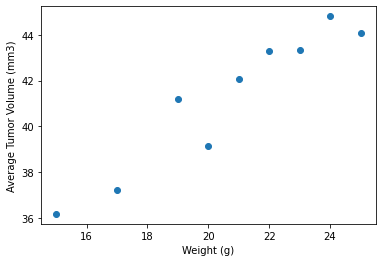

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [204]:
#############################       Wrong    #######################################################

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

tumor_to_weight = capomulin_mice.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

scatter = plt.scatter(tumor_to_weight.index, tumor_to_weight.values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
tumor_to_weight

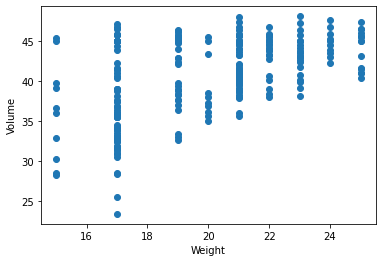

In [38]:
capomulin_mice = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
y_values = capomulin_mice['Tumor Volume (mm3)']
x_values = capomulin_mice['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.95


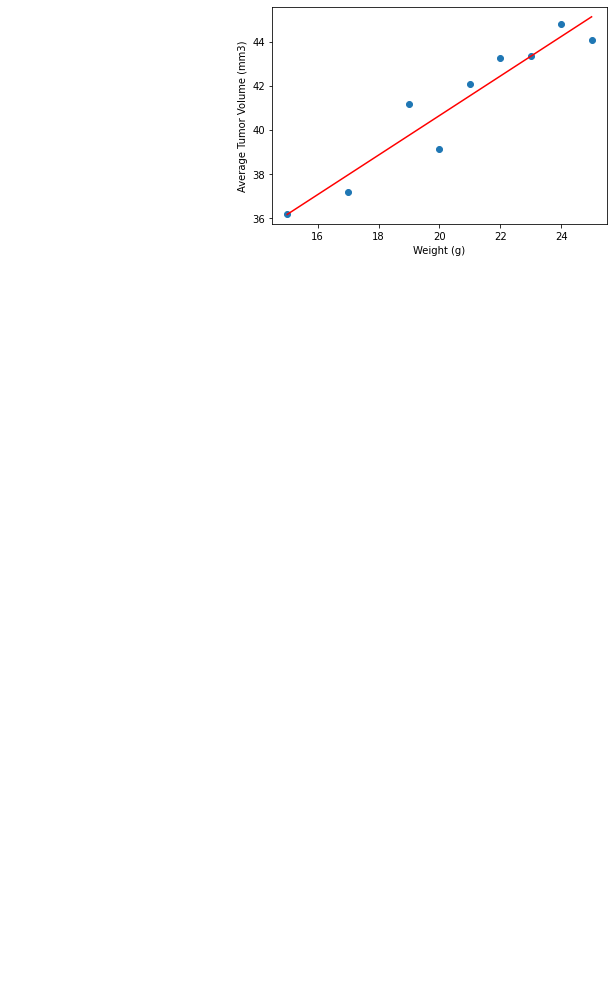

In [31]:
#Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(tumor_to_weight.index, tumor_to_weight.values)[0],2)}")

#Calculate the linear regression model for this
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_to_weight.index, tumor_to_weight.values)
regress_values = tumor_to_weight.index * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the plot and print
plt.scatter(tumor_to_weight.index,tumor_to_weight.values)
plt.plot(tumor_to_weight.index,regress_values,"red")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()